# Decision Tree Boston

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :3]])
boston_data = pd.DataFrame(data, columns =['crime', 'land_zone', 'indus', 'C_River', 'nox','avg_rooms', 'age','dist','r_highway', 'tax', 'pt_ratio','blacks','lstat','price_median_value'])

In [3]:
#3. remove outlier using median imputation

#plt.figure(figsize=(17,1))
for var in range(0,boston_data.shape[1]):
    temp=boston_data.columns[var]
    lower_quant=boston_data[temp].quantile(0.25)
    upper_quant=boston_data[temp].quantile(0.75)
    med=boston_data[temp].median()
    #print("\nColumn :",temp)
    #print("Lower Quantile:",lower_quant, "Upper Quantile :",upper_quant,"Median :",med)
    
    boston_data[temp] = np.where( (boston_data[temp] <lower_quant), med , boston_data[temp]) 
    #boston_data[temp] = np.where( (boston_data[temp] >upper_quant), med , boston_data[temp])
    #print("\n",boston_data.columns[var])
    #sns.boxplot(data=boston_data[temp])
   # plt.show()
        
#After Outlier Median imputation 
boston_clean=boston_data


In [4]:
#Split Data into X and y
array = boston_data.values
X = array[:, 0:13]
y = array[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((339, 13), (339,), (167, 13), (167,))

# Building Decision Tree Classifier using Entropy Criteria

In [5]:
model = DecisionTreeRegressor(criterion = "mse",max_depth=5)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

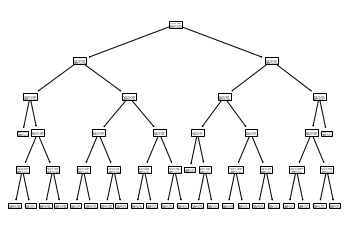

In [6]:
#PLot the decision tree
tree.plot_tree(model);

In [7]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

20.954945    86
22.887500    19
22.885185    13
48.807143    10
27.123529     9
31.805000     8
33.900000     7
22.000000     3
26.760000     3
37.900000     3
21.180000     2
27.500000     1
23.700000     1
43.400000     1
27.720000     1
dtype: int64

In [8]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds) 

col_0,20.954945,21.180000,22.000000,22.885185,22.887500,23.700000,26.760000,27.123529,27.500000,27.720000,31.805000,33.900000,37.900000,43.400000,48.807143
row_0,,,,,,,,,,,,,,,
17.2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17.4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17.8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
18.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
44.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
#Find the accuracy
model.score(X_test,y_test)

0.6074565110878175

In [11]:
#predicting on the test set and creating submission file
data_pred=pd.DataFrame(data=np.array([[0.25651,0.0,9.69,0.0,0.538,6.5750,65.2,4.09000,5.0,296.0,19.05,391.44,11.36]]),columns=['crime','land_zone','indus','C_River','nox','avg_rooms','age','dist','r_highway','tax','pt_ratio','blacks','lstat'])
#data_pred=pd.DataFrame(data=np.array([[6.25651,5.0,2.07,3.0,6.469,4.4210,78.5,3.96710,3.0,330.1,30.80,391.48,15.14]]),columns=['crime','land_zone','indus','C_River','nox','avg_rooms','age','dist','r_highway','tax','pt_ratio','blacks','lstat'])
model = DecisionTreeRegressor(criterion = "mse",max_depth=3)
model.fit(X_train,y_train)

#y_pred = model.predict(data_pred)
y_pred = model.predict(X_train)

accuracy=model.score(X_test, y_test)*100

print("\nAccuracy of Model is :",accuracy)
print("\nPrediction is :",y_pred)


Accuracy of Model is : 66.19490095139238

Prediction is : [21.66296296 31.875      21.66296296 21.66296296 21.66296296 21.66296296
 21.66296296 29.04222222 46.88888889 21.66296296 21.66296296 21.66296296
 21.66296296 21.66296296 29.04222222 21.66296296 21.66296296 29.04222222
 21.66296296 46.88888889 21.66296296 21.66296296 21.66296296 21.66296296
 21.66296296 21.66296296 21.66296296 21.66296296 21.66296296 21.66296296
 29.04222222 21.66296296 21.66296296 21.66296296 21.66296296 21.66296296
 21.66296296 21.66296296 21.66296296 29.04222222 29.04222222 21.66296296
 21.66296296 21.66296296 21.66296296 21.66296296 21.66296296 21.66296296
 35.11       21.66296296 21.66296296 21.66296296 21.66296296 21.66296296
 21.66296296 29.04222222 29.04222222 21.66296296 29.04222222 21.66296296
 21.66296296 21.66296296 21.66296296 21.66296296 21.66296296 21.66296296
 21.66296296 21.66296296 46.88888889 21.66296296 23.24117647 21.66296296
 29.04222222 35.11       46.88888889 23.24117647 46.88888889 21.6